1️⃣ Install & Import

In [1]:
!pip install yfinance matplotlib pandas
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
print("✅ Libraries ready.")


✅ Libraries ready.


2️⃣ Load Real-Time Data (your project dataset)

In [2]:
# Download 7-day data for 3 stocks
tickers = ["AAPL", "MSFT", "TSLA"]
data = {}
for t in tickers:
    df = yf.download(t, period="7d", interval="1d", progress=False)
    df.reset_index(inplace=True)
    data[t] = df

print("✅ Loaded live stock data")
data["AAPL"].head()

/tmp/ipython-input-485395864.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(t, period="7d", interval="1d", progress=False)
/tmp/ipython-input-485395864.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(t, period="7d", interval="1d", progress=False)
/tmp/ipython-input-485395864.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(t, period="7d", interval="1d", progress=False)


✅ Loaded live stock data


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2025-10-10,245.270004,256.380005,244.000000,254.940002,61999100
1,2025-10-13,247.660004,249.690002,245.559998,249.380005,38142900
2,2025-10-14,247.770004,248.850006,244.699997,246.600006,35478000
3,2025-10-15,249.339996,251.820007,247.470001,249.490005,33893600
4,2025-10-16,247.449997,249.039993,245.130005,248.250000,39777000


3️⃣ Natural Language → Plot Spec

In [3]:
def nl_to_plot_spec(nl: str):
    nl = nl.lower()
    if "apple" in nl:
        symbol = "AAPL"
    elif "microsoft" in nl:
        symbol = "MSFT"
    elif "tesla" in nl:
        symbol = "TSLA"
    else:
        symbol = "AAPL"

    if "volume" in nl:
        y = "Volume"
        title = f"{symbol} Volume over Time"
    else:
        y = "Close"
        title = f"{symbol} Closing Price over Time"

    return {"symbol": symbol, "x": "Date", "y": y, "kind": "line", "title": title}

# Example
print(nl_to_plot_spec("plot tesla closing price"))


{'symbol': 'TSLA', 'x': 'Date', 'y': 'Close', 'kind': 'line', 'title': 'TSLA Closing Price over Time'}


4️⃣ Generate the Chart

In [4]:
def plot_from_spec(data, spec):
    df = data[spec["symbol"]]
    x, y, kind, title = spec["x"], spec["y"], spec["kind"], spec["title"]

    plt.figure(figsize=(6,4))
    if kind == "line":
        plt.plot(df[x], df[y], linewidth=2)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


5️⃣ End-to-End Demo

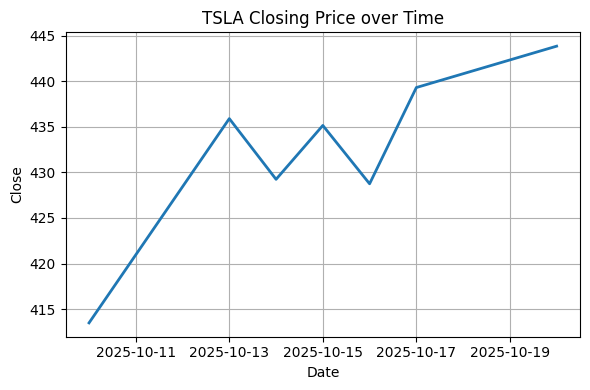

In [8]:
user_query = "plot tesla closing price for last 7 days"
spec = nl_to_plot_spec(user_query)
plot_from_spec(data, spec)


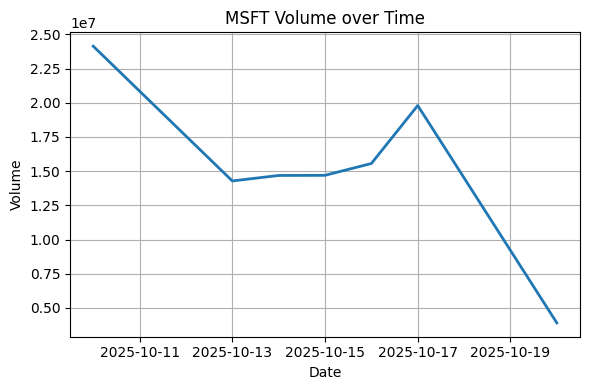

In [7]:
spec = nl_to_plot_spec("plot microsoft volume trend for last 7 days")
plot_from_spec(data, spec)